Best Position:  [-1.06281521e-08 -1.05592045e-07]
Best Value:  1.1262637622871417e-14


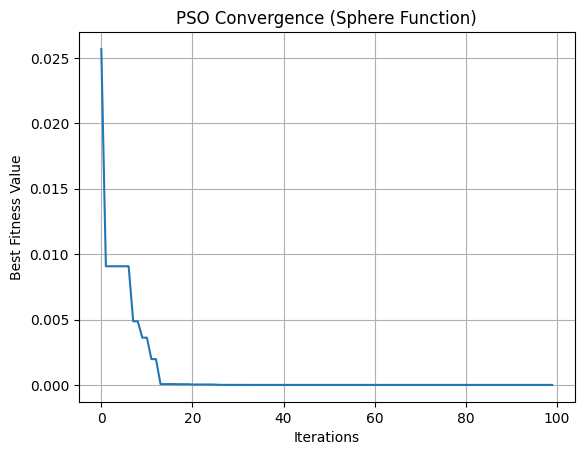

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The Sphere function is a simple optimization function, where the goal is to minimize the sum of squares of the input values.
def objective_function(x):
    return np.sum(x**2)  # Sphere function: f(x) = sum(x_i^2)

# 2. Initialize Parameters
num_particles = 30    # Number of particles in the swarm (candidate solutions)
dimensions = 2        # Number of dimensions for each particle (variables in the problem)
iterations = 100      # Number of iterations (generations) to run the algorithm
w = 0.7               # Inertia weight, controls the influence of the previous velocity
c1 = 1.5              # Cognitive coefficient (personal best attraction)
c2 = 1.5              # Social coefficient (global best attraction)

# 3. Initialize Particles
# The particles are initialized with random positions and velocities within a specific range.
particles = np.random.uniform(-5, 5, (num_particles, dimensions))  # Random initial positions between -5 and 5
velocities = np.random.uniform(-1, 1, (num_particles, dimensions))  # Random initial velocities between -1 and 1

# Personal best positions and values
pbest_positions = particles.copy()
pbest_values = np.apply_along_axis(objective_function, 1, particles)

# Global best position and value
gbest_position = pbest_positions[np.argmin(pbest_values)]
gbest_value = np.min(pbest_values)

# Track the best fitness values over iterations for plotting
fitness_values = []

# 4. Iterate over generations (iterations)
for _ in range(iterations):
    # For each particle, we update its velocity and position.
    for i in range(num_particles):
        # Random numbers between 0 and 1, used for the cognitive and social components
        r1, r2 = np.random.rand(2)  # Random values between 0 and 1 for variability
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest_positions[i] - particles[i]) +
                         c2 * r2 * (gbest_position - particles[i]))

        # Update the position of the particle based on its new velocity
        particles[i] = particles[i] + velocities[i]

        # Evaluate the fitness of the particle at its new position
        fitness = objective_function(particles[i])

        # If the current fitness is better (lower) than the personal best, update personal best
        if fitness < pbest_values[i]:
            pbest_values[i] = fitness
            pbest_positions[i] = particles[i]  # Update the particle's personal best position

    # After all particles have been updated, check if any particle found a better global best
    min_fitness_index = np.argmin(pbest_values)
    if pbest_values[min_fitness_index] < gbest_value:
        gbest_value = pbest_values[min_fitness_index]
        gbest_position = pbest_positions[min_fitness_index]

    # Append the best fitness value of this iteration for plotting
    fitness_values.append(gbest_value)

# Print the final best position and value
print("Best Position: ", gbest_position)
print("Best Value: ", gbest_value)

# Plot the convergence of the algorithm (best fitness value over iterations)
plt.plot(fitness_values)
plt.xlabel('Iterations')
plt.ylabel('Best Fitness Value')
plt.title('PSO Convergence (Sphere Function)')
plt.grid(True)
plt.show()
